In [1]:
# analytics
import pandas as pd 
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
#spatial 
import osmnx as ox
import geopandas as gpd
import contextily as cx
# plotting 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#settings
import warnings

In [2]:
# suppress deprication warnings
warnings.filterwarnings('ignore') 
# plot settings
sns.set_style('darkgrid')
sns.set_palette('rocket')

# erasmus colors
rgb_1 = (0,35,40) # eur bright green
rgb_2 = (12,128,102) # eur green
rgb_3 = (227, 218, 216) #eur warm grey 
rgb_4 = (255,215,0) # ese yellow

hex_1 = '#0c8066'
hex_2 = '#002328'
hex_3 = '#e3dad8'
hex_4 = '#ffd700'
# normalize for sns and pd plotting 
rgb_1, rgb_2, rgb_3, rgb_4 = [c/255 for c in rgb_1], [c/255 for c in rgb_2], [c/255 for c in rgb_3], [c/255 for c in rgb_4]
# eur color palettes 
yellow_bright = LinearSegmentedColormap.from_list(name= 'yellow_bright',colors=[hex_4, hex_3, hex_1])
yellow_dark = LinearSegmentedColormap.from_list(name='yellow_dark', colors=[hex_4, hex_3, hex_2])
bright_dark =  LinearSegmentedColormap.from_list(name='light_dark', colors=[hex_1, hex_3, hex_2])
sequential = LinearSegmentedColormap.from_list(name='sequential', colors=[hex_3, hex_1])
discrete = LinearSegmentedColormap.from_list(name='discrete', colors=[hex_1, hex_2, hex_3, hex_4])

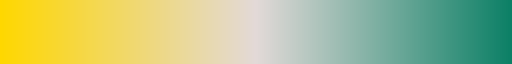

In [3]:
yellow_bright

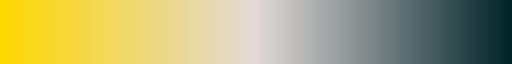

In [4]:
yellow_dark

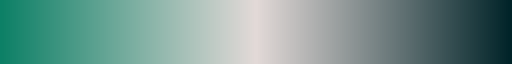

In [5]:
bright_dark

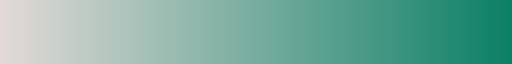

In [6]:
sequential

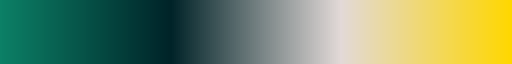

In [7]:
discrete

In [8]:
# load 2023 data set
path = 'data/fema_national_household_survey_2023_data_and_codebook.xlsx'
df = pd.read_excel(path, sheet_name='Hurricane', header=1)

## <span style = 'color:seagreen'> Data Cleaning <span>

<span style='color:orange'>
Let's select the important variables, rename and recode
<span>

In [12]:
list(df.columns)

['id',
 'sample',
 'hazard_weight',
 'state',
 'geographic_division',
 'census_region',
 'zipcode',
 'county',
 'hrcn_awareness',
 'hrcn_perception',
 'hrcn_exp',
 'hrcn_prepactions_a',
 'hrcn_prepactions_b',
 'hrcn_prepactions_c',
 'hrcn_prepactions_d',
 'hrcn_prepactions_e',
 'hrcn_prepactions_f',
 'hrcn_prepactions_g',
 'hrcn_prepactions_h',
 'hrcn_prepactions_i',
 'hrcn_prepactions_j',
 'hrcn_prepactions_k',
 'hrcn_prepactions_l',
 'hrcn_prepactions_m',
 'hrcn_prepactions_n',
 'hrcn_prepactions_emerplan',
 'hrcn_stepshelp',
 'hrcn_confidence',
 'hrcn_soc',
 'hrcn_likelyimpacts_a',
 'hrcn_likelyimpacts_b',
 'hrcn_likelyimpacts_c',
 'hrcn_likelyimpacts_d',
 'hrcn_likelyimpacts_e',
 'hrcn_likelyimpacts_f',
 'hrcn_shutters',
 'hrcn_hrcnactions_a',
 'hrcn_hrcnactions_b',
 'hrcn_hrcnactions_c',
 'hrcn_hrcnactions_d',
 'hrcn_hrcnactions_e',
 'hrcn_hrcnactions_f',
 'hrcn_hrcnactions_g',
 'hrcn_hrcnactions_h',
 'hrcn_hrcnactions_i',
 'hrcn_hrcnactions_j',
 'hrcn_hrcnactions_k',
 'hrcn_atlea

In [13]:
variables = ['id','state','zipcode','geographic_division','census_region','county','hrcn_iawareness','hrcn_iperception','hrcn_iexp',
             'hrcn_iprepefficacy','hrcn_prepactions_a','hrcn_prepactions_b','hrcn_prepactions_c','hrcn_prepactions_d',
             'hrcn_prepactions_e','hrcn_prepactions_f','hrcn_prepactions_g','hrcn_prepactions_h','hrcn_prepactions_i',
             'hrcn_prepactions_j','hrcn_prepactions_k','hrcn_prepactions_l','hrcn_prepactions_m','hrcn_prepactions_n',
             'age','sex','education','race_selfid','homeownership','income','rentmortgage', 'rurality','hazard_weight']
df = df[variables]

In [14]:
# Let's rename some variables
df = df.rename(columns= {
    'hrcn_prepactions_a': 'supplies',
    'hrcn_prepactions_b': 'insured',
    'hrcn_prepactions_c': 'involved',
    'hrcn_prepactions_d': 'learned_routes',
    'hrcn_prepactions_e': 'made_plan',
    'hrcn_prepactions_f': 'made_safer',
    'hrcn_prepactions_g': 'planned_neighbors',
    'hrcn_prepactions_h': 'practiced_drills',
    'hrcn_prepactions_i': 'documents',
    'hrcn_prepactions_j': 'rainy_day',
    'hrcn_prepactions_k': 'alerts',
    'hrcn_prepactions_l': 'family_communication',
    'hrcn_prepactions_m': 'none',
    'hrcn_prepactions_n': 'dont_know',
    'hrcn_iawareness': 'awareness',
    'hrcn_iperception': 'perception',
    'hrcn_iexp': 'experience',
    'hrcn_iprepefficacy': 'efficacy',
    'race_selfid': 'race'
})

## Don't forget to explore the new variables as well:
- efficacy
- race
- rurality
- ...

In [15]:
df.head()

,id,state,zipcode,geographic_division,census_region,county,awareness,perception,experience,efficacy,...,dont_know,age,sex,education,race,homeownership,income,rentmortgage,rurality,hazard_weight
0,1010,Mississippi,39564,East South Central,South,Jackson,Yes,Yes,Yes,High,...,Blank,50-59,Male,Associate's degree,White,Own,"$35,000 to $49,999","$751 - $1,000",Urban,0.426150
1,1011,Florida,32746,South Atlantic,South,Seminole,Yes,Yes,Yes,High,...,Blank,60-69,Female,Associate's degree,White,Rent,"$35,000 to $49,999","$1,501 - $2,000",Urban,0.665038
2,1012,Florida,33324,South Atlantic,South,Broward,Yes,Yes,Yes,High,...,Blank,70-79,Female,High school degree or diploma,White,Own,"$75,000 to $99,999","$1,001 - $1,500",Urban,1.072655
3,1013,Texas,77303,West South Central,South,Montgomery,No,Unknown,No,Low,...,Blank,40-49,Female,High school degree or diploma,White,Own,"$15,000 to $24,999",$0,Urban,0.443775
4,1014,Alabama,36609,East South Central,South,Mobile,Unknown,Yes,No,Low,...,Blank,40-49,Female,Associate's degree,White,Own,"$25,000 to $34,999",$1 - $500,Urban,0.281913


<span style='color:orange'>
Let's have a first look at the data 
<span>

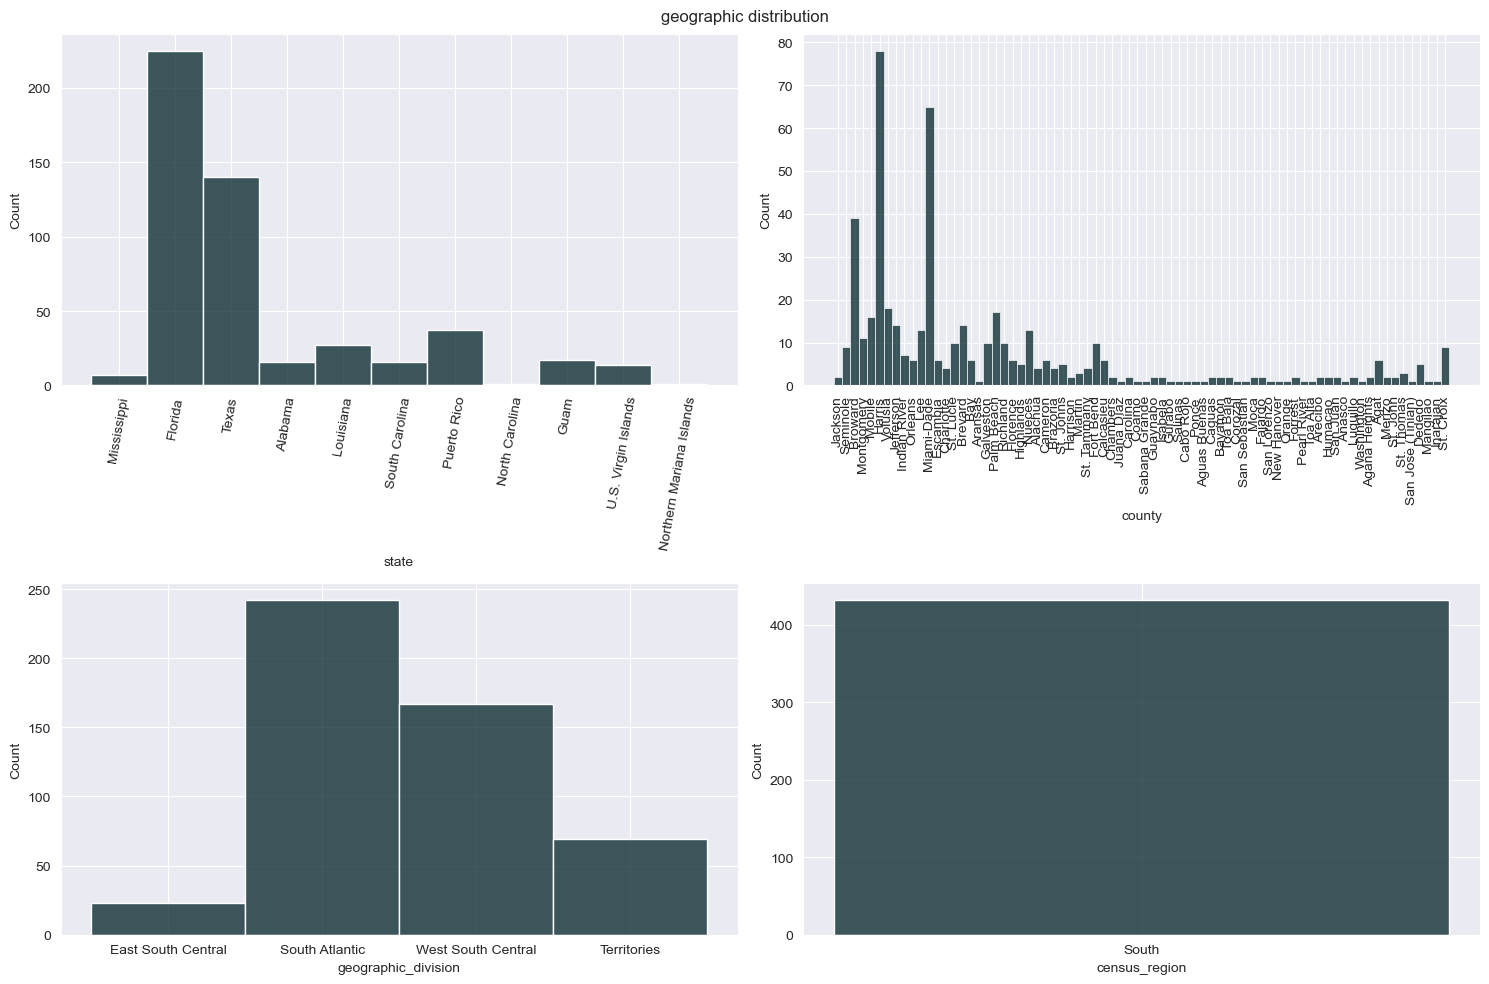

In [16]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.histplot(df.state, ax = ax[0,0], color=rgb_1)
sns.histplot(df.county, ax = ax[0,1], color=rgb_1)
sns.histplot(df.geographic_division, ax = ax[1,0], color=rgb_1)
sns.histplot(df.census_region, ax = ax[1,1], color=rgb_1)

#adjust individual x label rotations for readability
ax[0,0].tick_params(axis='x', rotation = 80)
ax[0,1].tick_params(axis='x', rotation=90)
plt.suptitle('geographic distribution')
plt.tight_layout() 

<span style="color:lightgreen">
findings: 

- only respondents in flood regions are included

- most respondents from florida 
- pacific underrepresnted compared to atlantic
<span>




<span style="color:orange">
to understand spatial distribution of respondents (and other variables, we will have to add shapefiles)

let's look into response variables first
<span>

AttributeError: 'DataFrame' object has no attribute 'floodzone'

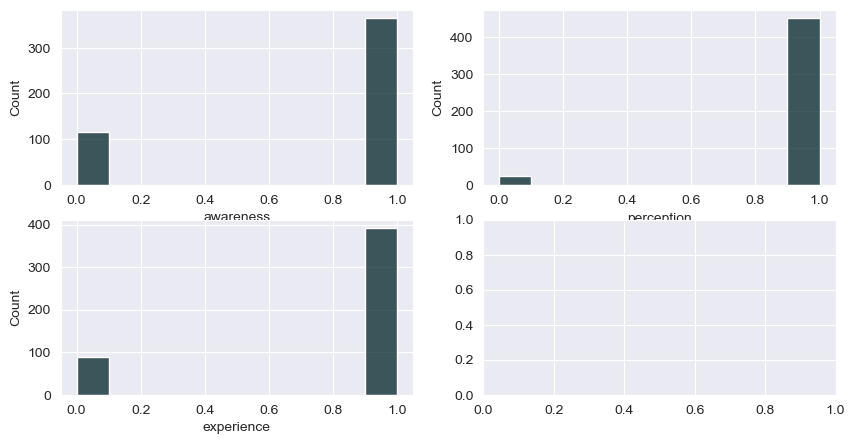

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

sns.histplot(df.awareness, ax = ax[0,0], color=rgb_1)
sns.histplot(df.perception, ax = ax[0,1], color=rgb_1)
sns.histplot(df.experience, ax = ax[1,0], color=rgb_1)

plt.suptitle('outcome variables')
plt.tight_layout() # avoid overlap of labels

<span style='color:lightgreen'>
findings: 

- ca 60% respondents do not live in a flood zone. That can in part be bc not every flood area is mapped by FEMA yet
- ca 20% has experienced flood before
- hrcn_perception gives rich data distribution

- don't know is a small number. Can we maybe leave them out? 

<span style= 'color:orange'>
Let's change the variable coding and dtypes to numeric
<span>

In [18]:
df.sex.replace({"Male":0, "Female":1, 'Third-Gender/Other': np.nan}, inplace = True)
df.homeownership.replace({'Rent':0, 'Own':1}, inplace = True)
df.rurality.replace({'Urban': 1, 'Rural': 0}, inplace=True)
df.efficacy.replace({'Low':0, 'High':1, 'Unknown': np.nan}, inplace=True)

In [20]:
variables = ['perception', 'awareness', 'experience']
dict = {
   'No': 0,
   'Yes': 1,
   'Unknown': np.nan,
   "Don't know": np.nan 
}
df[variables] = df[variables].replace(dict)

In [21]:
dict = {'Less than $10,000':10000,
        '$10,000 to $14,999':12500,
        '$15,000 to $24,999':20000,
        '$25,000 to $34,999':30000,
        '$35,000 to $49,999':47500,
        '$50,000 to $74,999':62500,
        '$75,000 to $99,999':87500,
        '$100,000 to $149,999':125000,
        '$150,000 to $199,999':175000,
        '$200,000 or more':290000
        }
df.income.replace(dict, inplace = True);

value for highest income bracket is representing median income in that bracket:

https://www.census.gov/programs-surveys/cps.html

https://www.census.gov/library/publications/2022/demo/p60-276.html

In [22]:
dict = {'18-19': 18.5,
        '20-29': 25,
        '30-39': 35,
        '40-49': 45,
        '50-59': 55,
        '60-69': 65,
        '70-79': 75,
        '80+': 90
}
df.age.replace(dict, inplace = True);

In [23]:
dict={'Less than high school diploma':0,
      'High school degree or diploma':1,
      'Some college, no degree':2,
      "Associate's degree":3, 
      "Bachelor's degree":4, 
      'Post graduate work/degree or professional degree':5
      }
df.education.replace(dict, inplace = True)

In [24]:
dict={'$0' : 0,
      '$1 - $500':250,
      '$501 - $750':675,
      '$751 - $1,000':875,
      '$1,001 - $1,500':1250,
      '$1,501 - $2,000':1750,
      '$2,001 - $2,500':2250,
      '$2,501 - $3,000':2750,
      'More than $3,000':3000,
      "Don't know": np.nan
      }
df.rentmortgage.replace(dict, inplace = True)

In [25]:
df.supplies.replace({'Blank': 0, 'Assembled or updated supplies': 1}, inplace=True)
df.insured.replace({'Blank': 0, 'Documented and insured property': 1}, inplace=True)
df.involved.replace({'Blank': 0, 'Got involved in my community': 1}, inplace=True)
df.learned_routes.replace({'Blank': 0, 'Learned my evacuation routes': 1}, inplace=True)
df.made_plan.replace({'Blank': 0, 'Made a plan': 1}, inplace=True)
df.made_safer.replace({'Blank': 0, 'Made my home safer': 1}, inplace=True)
df.planned_neighbors.replace({'Blank': 0, 'Planned with neighbors': 1}, inplace=True)
df.practiced_drills.replace({'Blank': 0, 'Practiced emergency drills or habits': 1}, inplace=True)
df.documents.replace({'Blank': 0, 'Safeguarded documents': 1}, inplace=True)
df.rainy_day.replace({'Blank': 0, 'Saved for a rainy day': 1}, inplace=True)
df.alerts.replace({'Blank': 0, 'Signed up for alerts and warnings': 1}, inplace=True)
df.family_communication.replace({'Blank': 0, 'Tested family communication plan': 1}, inplace=True)
df.none.replace({'Blank': 0, 'None of the above': 1}, inplace=True)
df.dont_know.replace({'Blank': 0, "Don't know": 1}, inplace=True)

# let's also code as integer
variables = ['supplies','insured', 'involved', 'learned_routes', 'made_plan', 
             'made_safer', 'planned_neighbors', 'practiced_drills', 'documents', 
             'rainy_day', 'alerts','family_communication', 'none', 'dont_know']
df[variables] = df[variables].astype(int)

In [26]:
# lets recode zipcodes as string and fill up leading zeros that have gone missing 
df.zipcode = df.zipcode.astype('string')

for i in df.index: 
    if len(df.at[i,'zipcode']) == 4: 
        df.at[i,'zipcode'] = str(0) + df.at[i,'zipcode']
    if len(df.at[i,'zipcode']) <= 4:
        print(i)
# classic lets try shit and pray loop... Make sure we fetched all exceptions...

197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
358
362
368
370
375
378
380
381
383
384
385
415
473
475
476
483
485
490
491
492
494
496
497
498
499
500


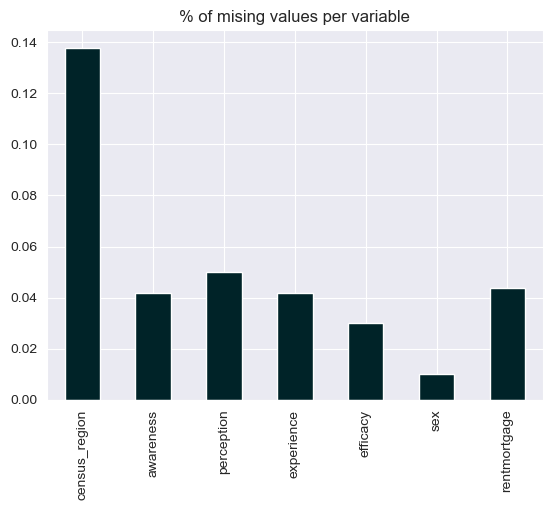

In [29]:
# let's see how many variables we have lost due to np.nan coding
df.loc[:, df.isna().any()].isna().mean().plot(kind='bar', title='% of mising values per variable', color=rgb_1);

In [30]:
# let's see how many floodzones have np.nan where we find values for the same zipcode
non_null_floodzone = (
    df.groupby('zipcode')['floodzone']
      .transform(lambda x: x.notna().any())
) # returns true if there a value for the same zipcode exists somewhere in df 
df['check'] = df['floodzone'].isna() & non_null_floodzone 
(df['check'] == True).sum() #how many values can we fill in manually like this? 

KeyError: 'Column not found: floodzone'

In [27]:
def fill_if_unique(grp):
    non_null_values = grp.dropna().unique()
    if len(non_null_values) == 1:
        # Only one unique floodzone in this group => fill all NaNs with it
        return grp.fillna(non_null_values[0])
    else:
        # Either no non-null values or multiple different ones => leave as is
        return grp

df['floodzone'] = df.groupby('zipcode')['floodzone'].transform(fill_if_unique)


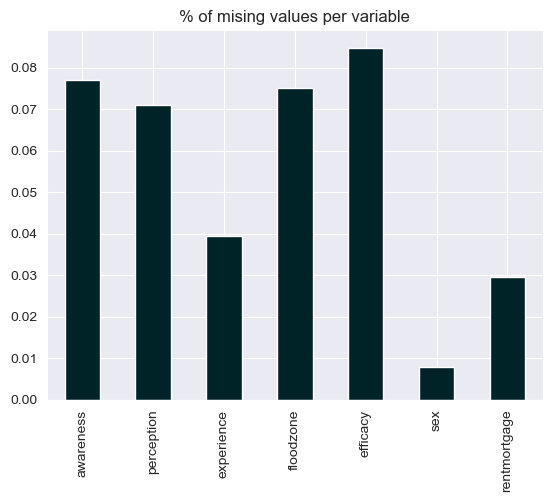

In [28]:
df.loc[:, df.isna().any()].isna().mean().plot(kind='bar', title='% of mising values per variable', color=rgb_1);

In [29]:
df = df.drop(columns='check')

### Double check this code block above!

In [30]:
df.dropna(inplace=True) 

In [31]:
df.shape # lost ca 100 obs (20%)

(385, 34)

## <span style='color:seagreen'> Exploratory Analysis <span>

<span style='color:orange'>
Let's have a look at adaptation measures

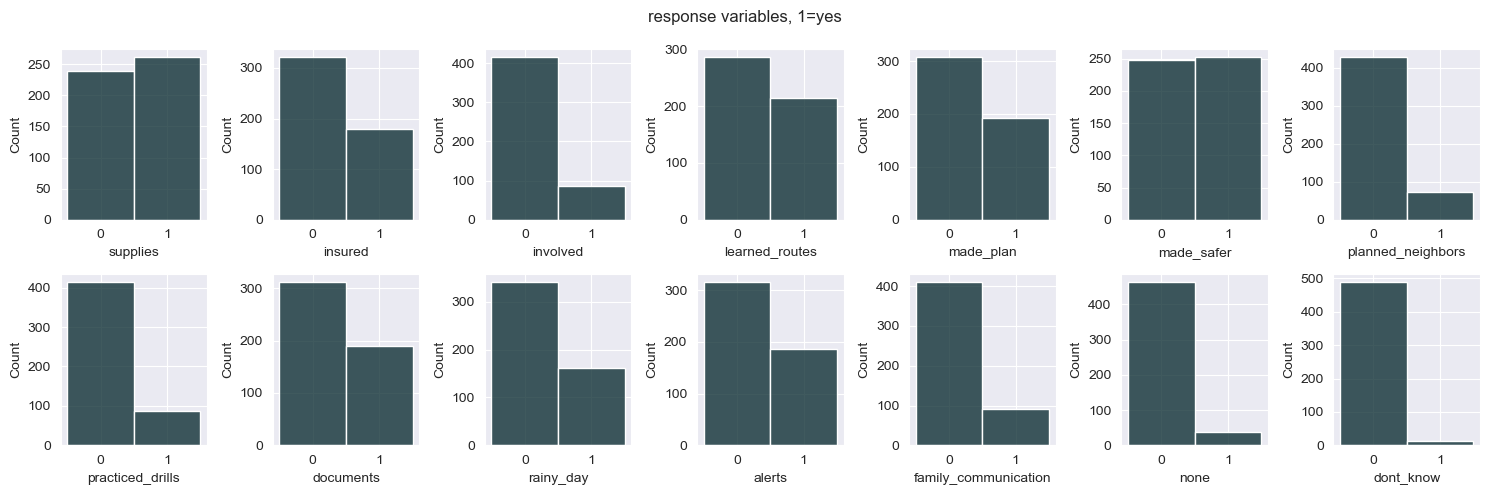

In [31]:
fig, ax = plt.subplots(2,7, figsize=(15,5))
ax = ax.flatten()
for idx, var in enumerate(variables): 
    sns.histplot(df[var], ax = ax[idx], discrete=True, color=rgb_1)
plt.suptitle('response variables, 1=yes')
plt.tight_layout()

<span style = 'color: lightgreen'>
findings: 

- 40% of respondents have implemented nothing

- almost all adaptation options are implemented equally often. 
<span>


<span style = 'color: orange'>
Let's look at some correlations
<span>


<Axes: >

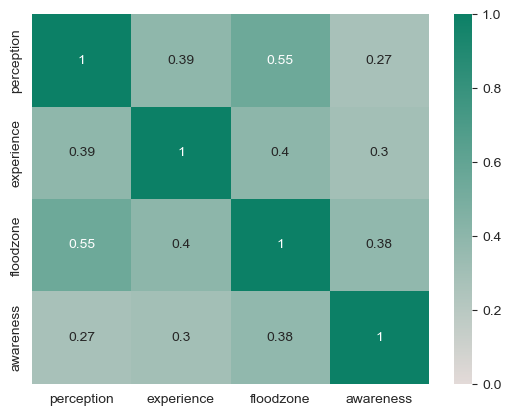

In [33]:
variables = ['perception', 'experience', 'floodzone', 'awareness']
sns.heatmap(df[variables].corr(), cmap = sequential, vmin=0, vmax=1, annot=True)

In [34]:
NumFloodzone = len(df[df.floodzone == 1]) # number of respondents living in floodzones
NumNoFloodzone = len(df[df.floodzone == 0])
NumExp = len(df[df.experience == 1]) # number of respondents with flood experience
NumFloodzoneExp = len(df[(df.floodzone == 1) & (df.experience == 1)]) # number of respondents who live in floodzones and have flood experience
NumNoFloodzoneExp = len(df[(df.floodzone == 0) & (df.experience == 1)])
share = NumFloodzoneExp/NumFloodzone * 100
print('share of respondents in flood zones who have experiecned flood =',share, '%')
shareNoFloodzone = NumNoFloodzoneExp / NumNoFloodzone * 100
print('share of respondents who have experienced flood outside a floodzone=', shareNoFloodzone,'%')

share of respondents in flood zones who have experiecned flood = 56.451612903225815 %
share of respondents who have experienced flood outside a floodzone= 17.24137931034483 %


<span style = 'color:lightgreen'>
findings: 


- all possible predictors correlate at least a bit

- floodzone and perception correlate strongly
- experience and perception correlate even less than floodzone and perception (42%)
- one explanation: experience and floodzone correlate at 28% -> low correlations with floodzones stem from the fact that 15% of flood experiences were recorded outside a floodzone
<span>

<span style = 'color:orange'>


<Axes: >

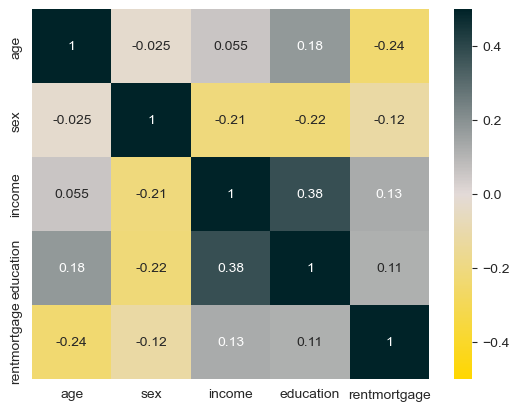

In [35]:
variables = ['age', 'sex', 'income', 'education', 'rentmortgage']
sns.heatmap(df[variables].corr(), cmap=yellow_dark, vmin=-0.5, vmax=0.5, annot = True) # note that effect directions are taken out for purpose of color mapping

<span style= 'color:lightgreen'>
findings: 

- correlation among covariates are small 

- notably, low correlation between age and income

- note relation between (education, rentmortgage) and age

- variables are nominal, correlation mathematically incorrect. 

<span style= 'color:orange'>
Let's map relationships between covariates and responses


In [36]:
variables = ['perception', 'experience', 'floodzone', 'awareness']
index = ['age', 'sex', 'income', 'rentmortgage', 'education']
age = [np.corrcoef(df.age, df[var])[0,1] for var in variables]
sex = [np.corrcoef(df.sex, df[var])[0,1] for var in variables]
income = [np.corrcoef(df.income, df[var])[0,1] for var in variables]
rentmortgage = [np.corrcoef(df.rentmortgage, df[var])[0,1] for var in variables]
education = [np.corrcoef(df.education, df[var])[0,1] for var in variables]

cor_df = pd.DataFrame([age, sex, income, rentmortgage, education] , index = index, columns = variables)
cor_df

,perception,experience,floodzone,awareness
age,-0.374431,-0.234305,-0.283017,-0.124296
sex,0.046859,0.006192,0.057011,0.048773
income,0.038231,-0.014359,-0.042518,-0.055569
rentmortgage,0.133311,0.182931,0.090703,0.174686
education,-0.049833,-0.015560,-0.036776,-0.026562


Text(0.5, 1.0, 'correlations')

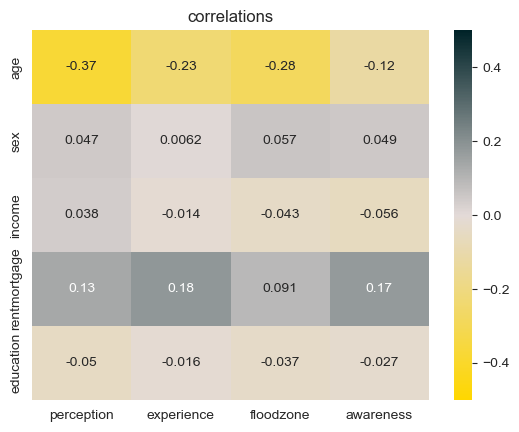

In [37]:
fig, ax = plt.subplots()
fig = sns.heatmap(cor_df, cmap=yellow_dark, vmin=-0.5, vmax=0.5, annot=True)
plt.title('correlations')

<span style='color:lightgreen'>
findings: 

- older respondents are expecting less flooding
- older respondents are less likely to have experienced floodings??? 

<span style = 'color:orange'>
Let's have a look at correlations between outcome variables
<span>

<Axes: >

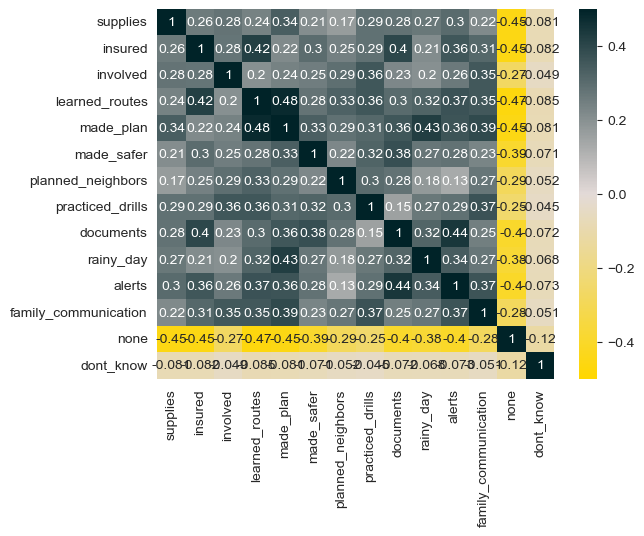

In [38]:
variables = ['supplies', 'insured', 'involved', 'learned_routes', 'made_plan',
             'made_safer', 'planned_neighbors', 'practiced_drills', 'documents', 'rainy_day',
             'alerts', 'family_communication', 'none', 'dont_know']
sns.heatmap(df[variables].corr(),cmap=yellow_dark, vmin=-0.5, vmax=0.5, annot=True)

<span style= 'color:lightgreen'>
findings: 

- all of the above correlate in same range: no specific links between specific types of adaptation 
- learned_routs and insured correlate stronger
- documents and insured correlate stronger
- alerts and insured correlate stronger
- made_plan and learned_routes correlate stronger

- alerts and documents correlate stronger

## <span style='color:seagreen'>Spatial Mapping<span>

In [45]:
path = "/Users/philip/Documents/ESE/ESE_thesis/flood_experience/shapefiles/tl_2024_us_zcta520.shp"
shp_gdf = gpd.read_file(path)
shp_gdf = shp_gdf.drop(columns=['ZCTA5CE20','GEOIDFQ20','CLASSFP20','MTFCC20','FUNCSTAT20','ALAND20','AWATER20','INTPTLAT20','INTPTLON20'])

In [46]:
# lets merge it baby
shp_gdf= shp_gdf.rename(columns={'GEOID20':'zipcode'})
gdf = df.merge(shp_gdf, on = 'zipcode', how = 'left')
gdf = gpd.GeoDataFrame(gdf, geometry = gdf.geometry)

In [47]:
# adjust crs to cx requirements (Web Mercator)
gdf = gdf.to_crs(epsg=3857)  
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

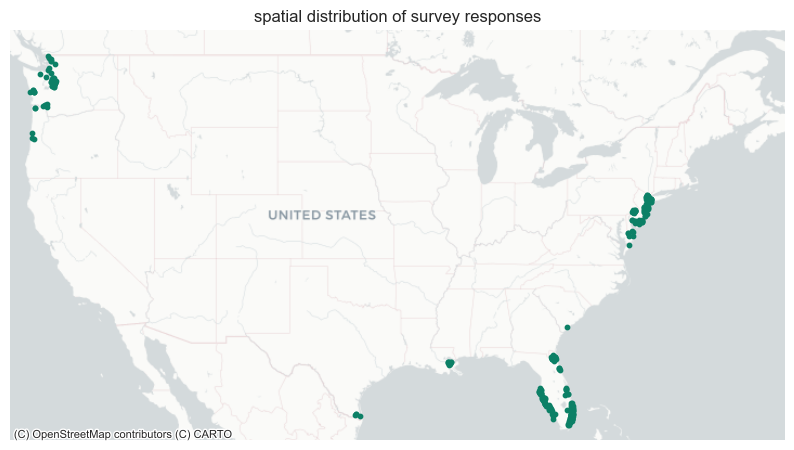

In [73]:
us_bounds = (-14000000, 2800000, -7000000, 6500000)  

# Let's switch to point geometries so that we can increase the marker size manually
gdf_points = gdf.copy()
gdf_points['geometry'] = gdf_points.centroid

fig, ax = plt.subplots(figsize=(10,10))
gdf_points.plot(ax=ax, color=rgb_2, alpha=1, markersize=10)
ax.set_xlim(us_bounds[0], us_bounds[2])  # Longitude limits
ax.set_ylim(us_bounds[1], us_bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('spatial distribution of survey responses')
plt.savefig('figures/us_map.png')

<span style= 'color:lightgreen'>
findings: 

- Many flood regions (California & mid-East Coast) have no responses in the 2023 data

- focus regions will be washington/ oregon, florida, new jersey/ pennsylvania/ delaware/ virginia


<span style= 'color:orange'>
to do: 

- check response distribution against other years

In [74]:
# Let's add a column to our dataframe that counts total occurence of zipcodes 
zip_counts = df.groupby(by='zipcode').size()
zip_counts = pd.DataFrame(zip_counts, columns=['zip_count'])
gdf = gdf.merge(zip_counts, on = 'zipcode', how='left')

KeyError: 'zip_count'

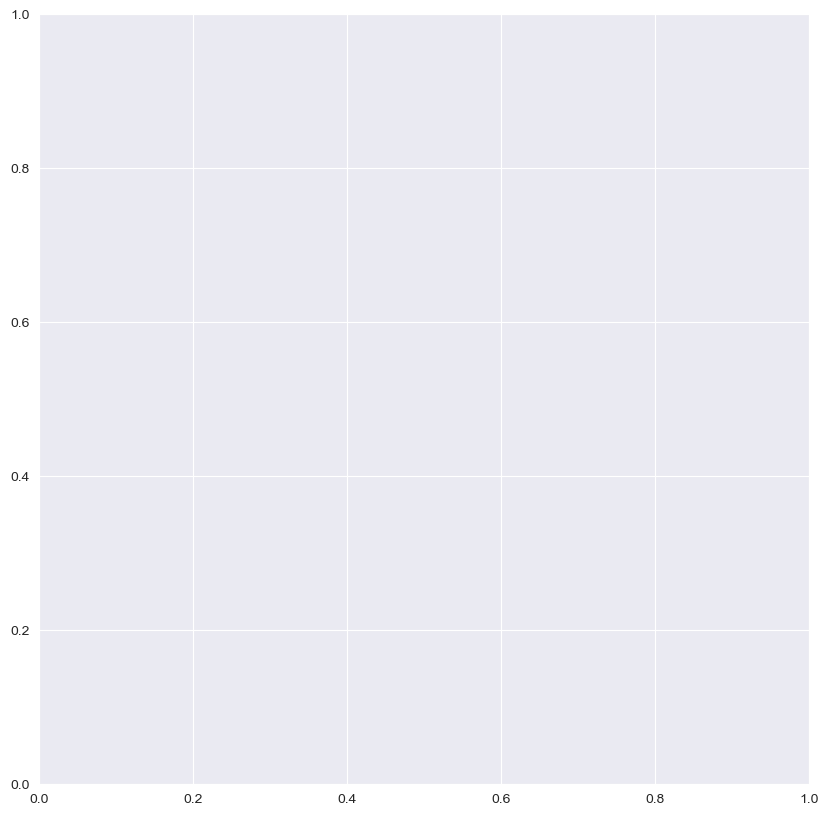

In [75]:
# new jersey
bounds = (-8500000, 4500000, -8000000, 5100000)

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, cmap='crest', alpha=1, column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])  # Longitude limits
ax.set_ylim(bounds[1], bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title('absolute count of zipcodes')
plt.savefig('figures/density/newjersey_zips_density.png')

KeyError: 'zip_count'

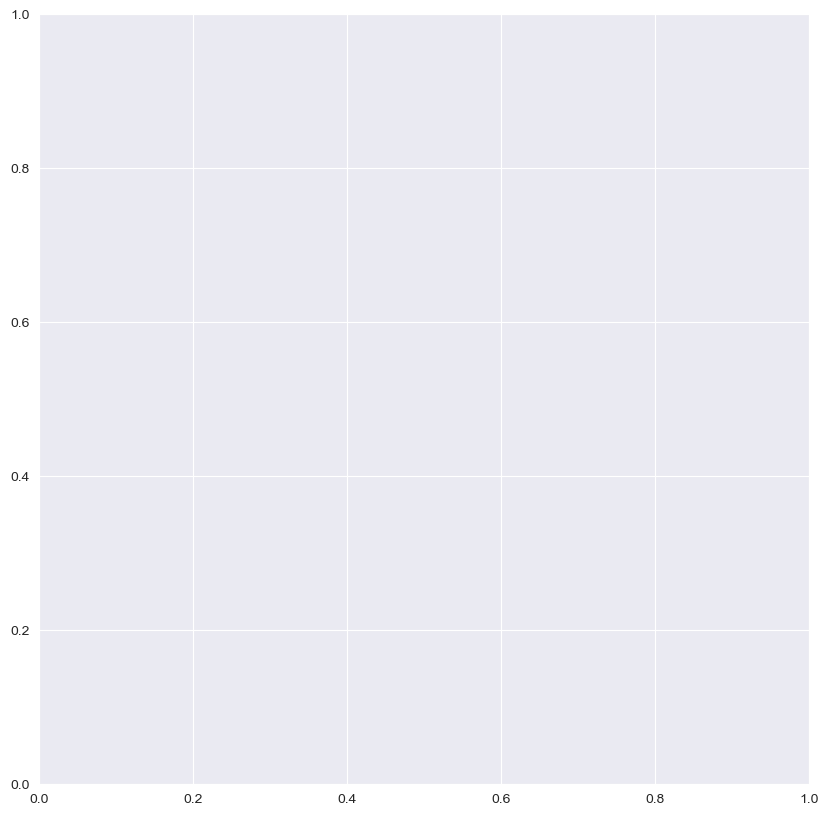

In [76]:
# florida
bounds = (-9500000, 2800000,  -8700000, 3800000)

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, cmap='crest', alpha=1, column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])  # Longitude limits
ax.set_ylim(bounds[1], bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title('absolute count of zipcodes')
plt.savefig('figures/density/florida_zips_density.png')

KeyError: 'zip_count'

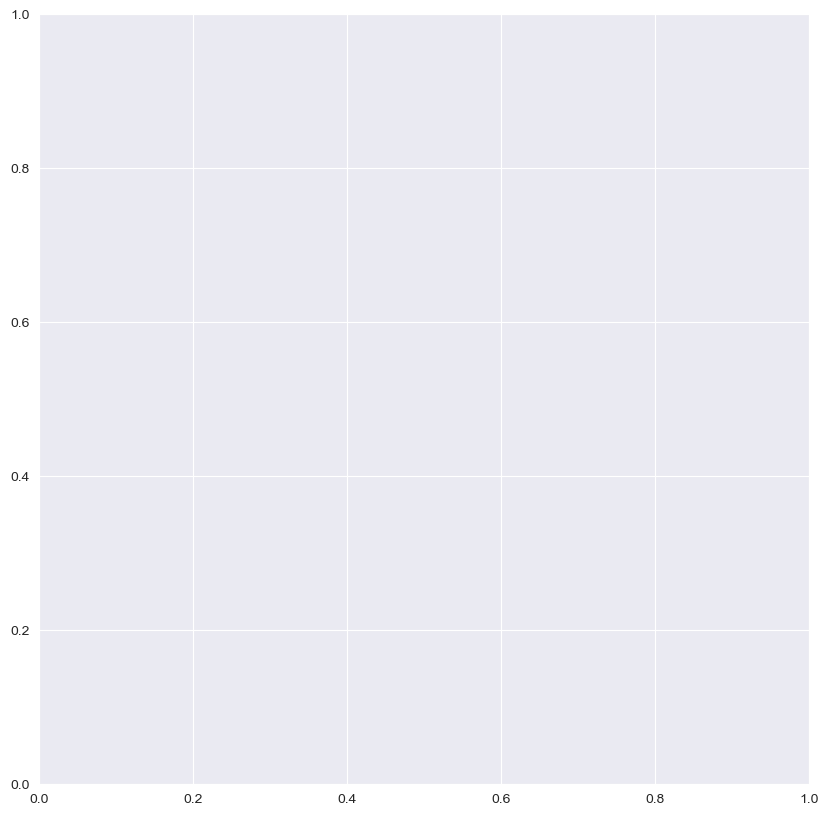

In [77]:
# seattle
bounds = (-14000000, 5300000, -13000000, 6500000)

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, cmap='crest', alpha=1, column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])  # Longitude limits
ax.set_ylim(bounds[1], bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title('absolute count of zipcodes')
plt.savefig('figures/density/seattle_zips_density.png')

<span style='color:lightgreen'>
Findings:

- highest count of repsonses in one zipcode is 5

- overall, response rate spread very thin across space, very evenly

- most responses are in florida (see above too) but are evenly dispersed in space  

- spatial interaction might be hard to fetch with such low data density
- LISA plots / spatial autocorrelation not making sense anymore?

<span style='color:orange'>
Let's search for seperating equilibria next 

FileNotFoundError: [Errno 2] No such file or directory: 'figures/density/insurance.png'

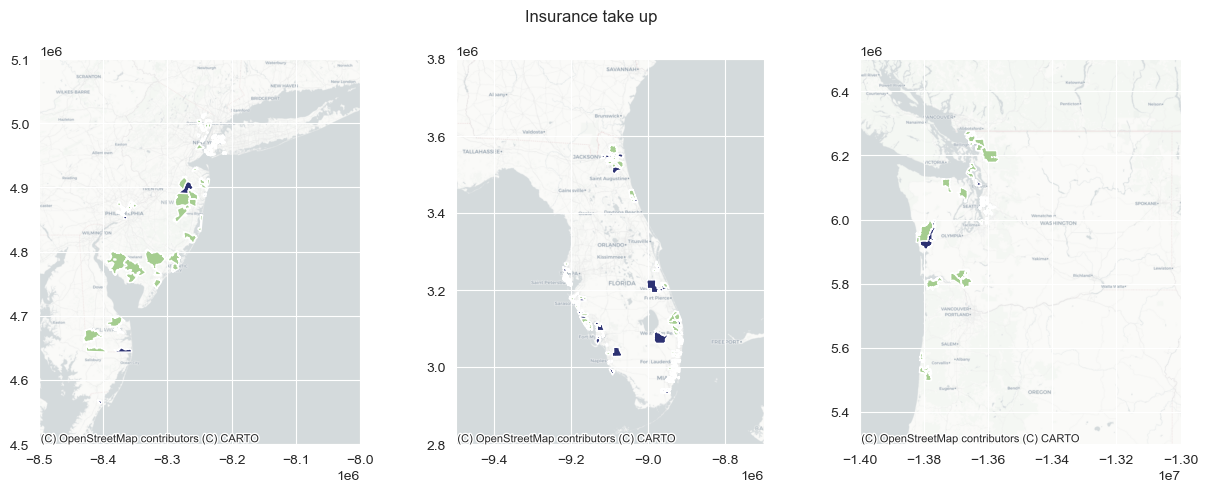

In [78]:
# let's plot insurance takeup

bounds = [(-8500000, 4500000, -8000000, 5100000),       #new jersey
          (-9500000, 2800000,  -8700000, 3800000),      #florida
          (-14000000, 5300000, -13000000, 6500000)]     #seattle

fig, ax = plt.subplots(1,3, figsize=(15,5))

for idx, var in enumerate(bounds):    
    gdf.plot(ax=ax[idx], cmap='crest', column='insured', categorical=True)
    ax[idx].set_xlim(bounds[idx][0], bounds[idx][2])
    ax[idx].set_ylim(bounds[idx][1], bounds[idx][3])
    cx.add_basemap(ax[idx], source=cx.providers.CartoDB.Positron)

plt.suptitle('Insurance take up')
plt.savefig('figures/density/insurance.png')

<span style='color:lightgreen'>
findings: 

- insurance take up is much more pronounced in florida, compared to seattle and new jersey

- first hint at pooling equilibrium 

- lets see if there are counfounding factors? 

See prints: 3by3 plot

<span style = 'color:lightgreen'>
findings: 

- experience seems to correlate with insurance take up 

- when you know that you are in a flood zone, you are more likely linsured in new jersey and florida, but not in seattle! 

- in seattle people are having higher perception but no experience -> no insurance take up

- in florida we have high perception, high experience, and high take up

<span style='color:orange'>
Let's confirm difference in share of adaptaion outcomes

In [ ]:
adaptations = gdf.groupby('state').agg(
    supplies = ('supplies','mean'),
    insurance = ('insured','mean'),
    involved = ('involved','mean'),
    learned_routes = ('learned_routes','mean'),
    made_plan =  ('made_plan', 'mean'),
    made_safer = ('made_safer', 'mean'),
    planned_neighbors = ('planned_neighbors', 'mean'),
    practiced_drills = ('practiced_drills', 'mean'),
    documents = ('documents', 'mean'),
    rainy_day = ('rainy_day', 'mean'),
    alerts = ('alerts', 'mean'),
    family_communication = ('family_communication', 'mean'),
    none = ('none', 'mean'),
    dont_know = ('dont_know', 'mean')
    ).transpose()

<Axes: title={'center': 'share of adaptations implemented per state'}>

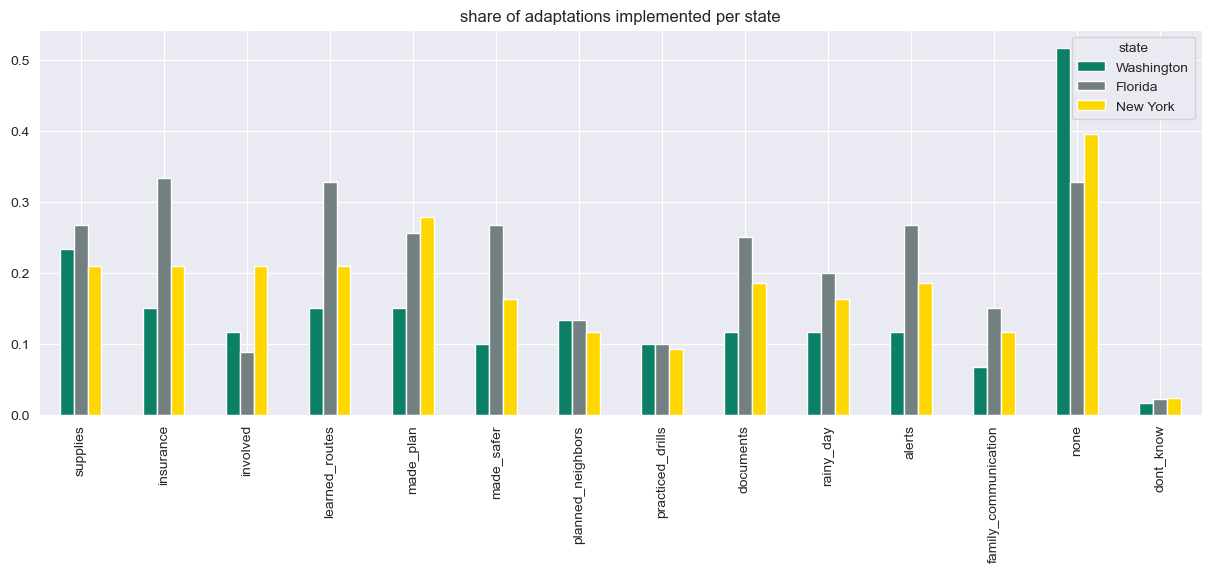

In [ ]:
adaptations[['Washington', 'Florida', 'New York']].plot(
    kind='bar', 
    figsize=(15,5), 
    title='share of adaptations implemented per state',
    cmap=discrete)

<span style = 'color:lightgreen'>
findings: 

- numbers might still be a bit skewed: FLorida and Washington are dispersed spatially more than New York

- Florida has generally higher share of adaptations implemented -> seperating equilibrium? 

<span style = 'color:orange'> Let's drill down into focus regions. This will allow us to investigate possible spatial interactions

In [ ]:
# let's build seperate frames for each focus region
seattle = gdf[(gdf.county == 'King')]

newyork = gdf[(gdf.county == 'Kings') | 
              (gdf.county == 'Hudson') |
              (gdf.county == 'Queens')]

jacksonville = gdf[(gdf.county == 'Duval')]

miami = gdf[(gdf.county == 'Broward') |
            (gdf.county == 'Miami-Dade') |
            (gdf.county == 'Palm Beach') | 
            (gdf.county == 'Martin')]

sarasota = gdf[(gdf.county == 'Sarasota') | 
               (gdf.county == 'Charlotte') | 
               (gdf.county == 'Lee') |
               (gdf.county == 'Pinellas') | 
               (gdf.county == 'Collier')]

# let's add a column that indicates the focus region 
seattle["focus_region"] = "Seattle"
newyork["focus_region"] = "New York"
jacksonville["focus_region"] = "Jacksonville"
miami["focus_region"] = "Miami"
sarasota["focus_region"] = "Sarasota"

# let's put all together 
focus_regions = pd.concat([seattle, newyork, jacksonville, miami, sarasota])

## <span style='color:seagreen'> Relationships <span>

In [ ]:
# Let's explore correlations on the focus_region level. We hope for differences in correlations between focus regions
variables = ['awareness', 'perception', 'experience', 'floodzone', 'efficacy', 'supplies', 'insured', 'involved', 'learned_routes',
             'made_plan', 'made_safer', 'planned_neighbors', 'practiced_drills', 'documents', 'rainy_day', 'alerts', 'family_communication',
              'none', 'dont_know' ,'age', 'sex','education', 'homeownership', 'income', 'rentmortgage','rurality' ,'zip_count']

In [ ]:
dependent = ['supplies', 'insured', 'involved', 'learned_routes', 'made_plan', 'made_safer', 'planned_neighbors', 
            'practiced_drills', 'documents', 'rainy_day', 'alerts', 'family_communication', 'none', 'dont_know']
independent = ['floodzone', 'awareness', 'experience', 'perception', 'efficacy']
covariate = ['age', 'income', 'race', 'education', 'homeownership']

In [ ]:
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(df[var], df[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(df[var], df[v]) for v in covariate]

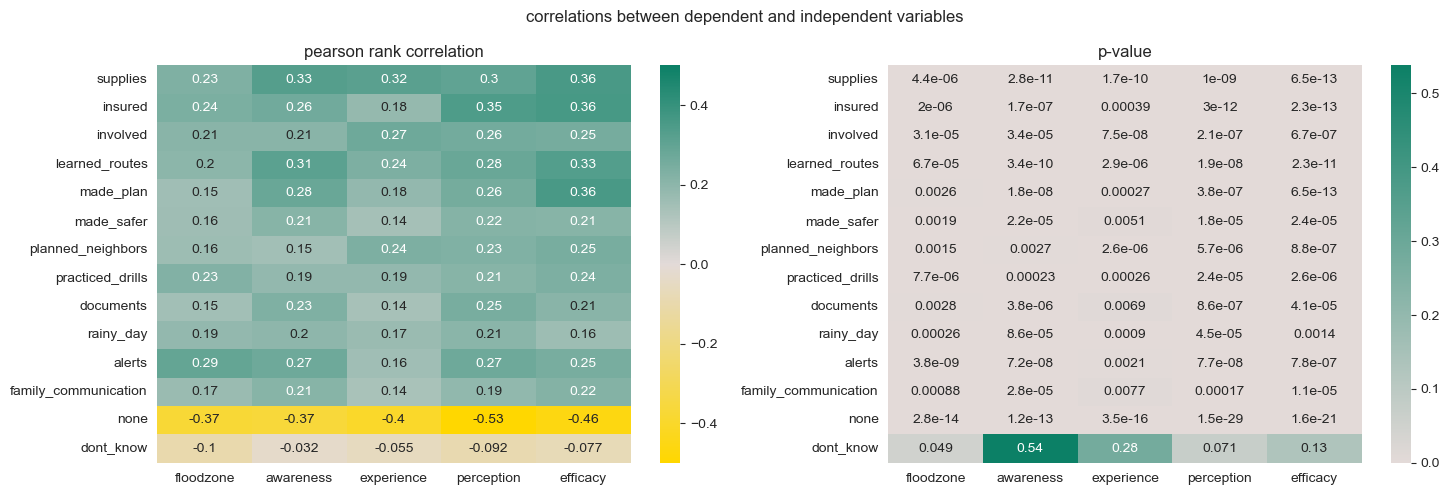

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) # access spearman r with lambda function
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) # access p-value with lambda function
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/full.png')

<span style = 'color:lightgreen'> 

- supplies - efficacy

- supplies - floodzone + awareness + experience

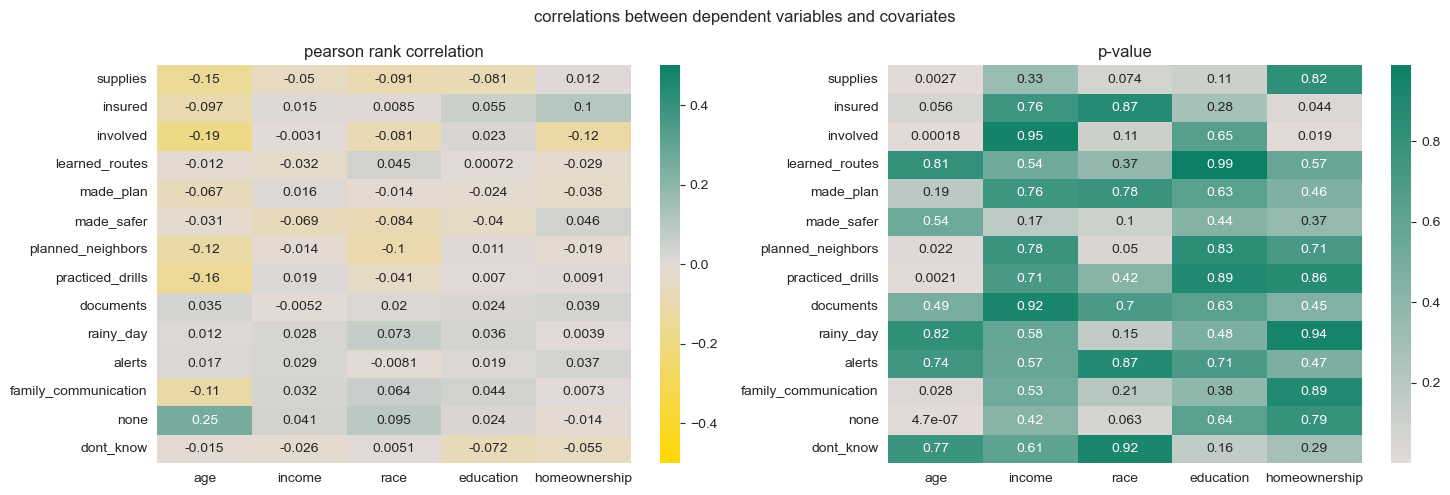

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_cov.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) # access spearman r with lambda function
sns.heatmap(data=dep_cov.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) # access p-value with lambda function
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('correlations between dependent variables and covariates')
plt.tight_layout()
plt.savefig('figures/relations/covariates_full.png')

 <span style = 'color:lightgreen'> 

- no meaningful correlations

- age seems to predict

<span style= 'color:orange'> Let's compare correlations across focus regions

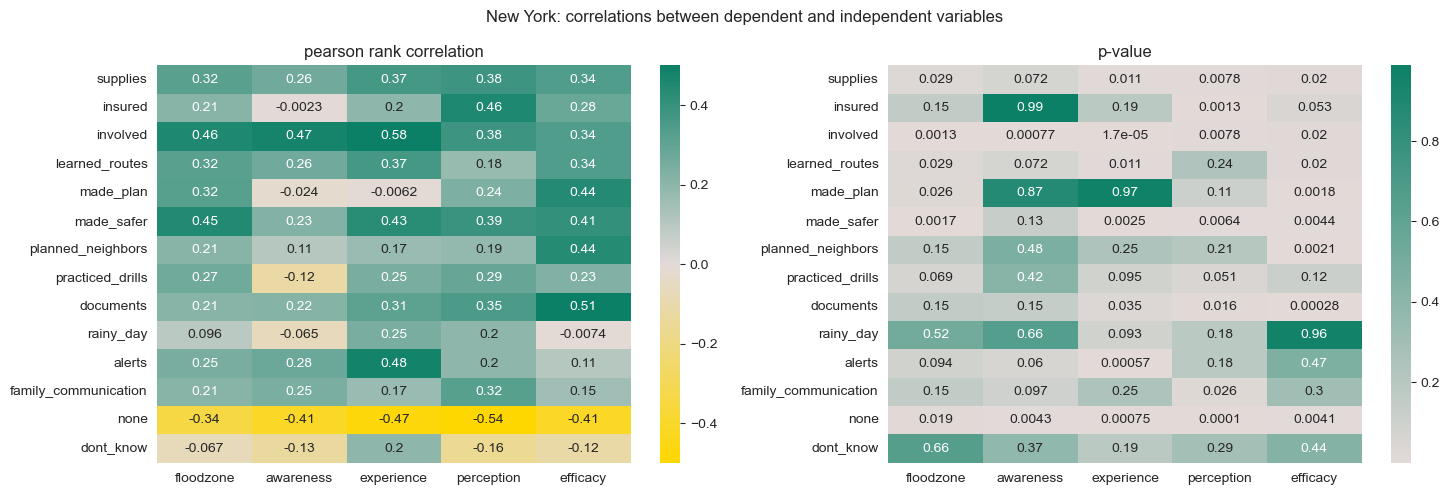

In [ ]:
# New York
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(newyork[var], newyork[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(newyork[var], newyork[v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('New York: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/newyork.png')

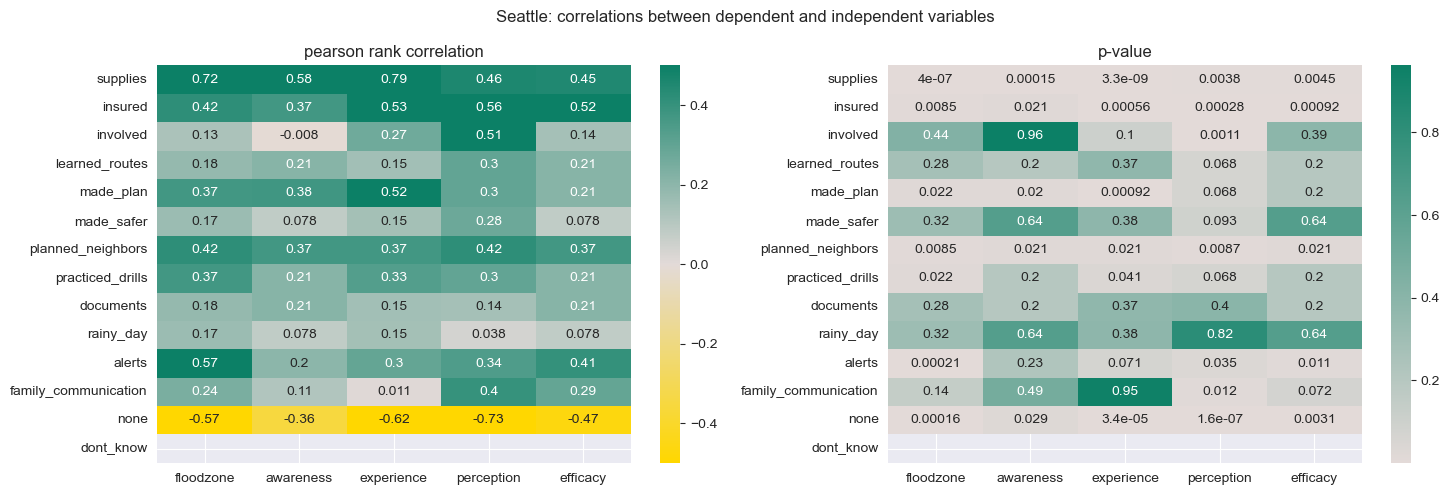

In [ ]:
# Seattle
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(seattle[var], seattle[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(seattle[var], seattle[v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Seattle: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/seattle.png')

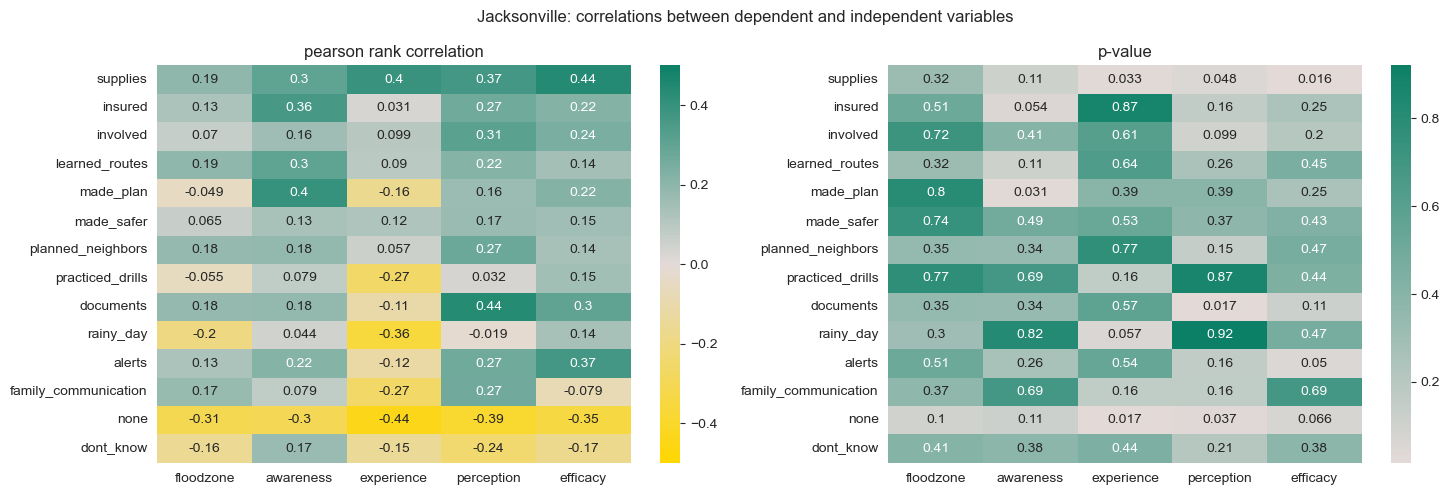

In [ ]:
# Jacksonville
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(jacksonville[var], jacksonville[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(jacksonville[var], jacksonville[v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Jacksonville: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/jacksonville.png')

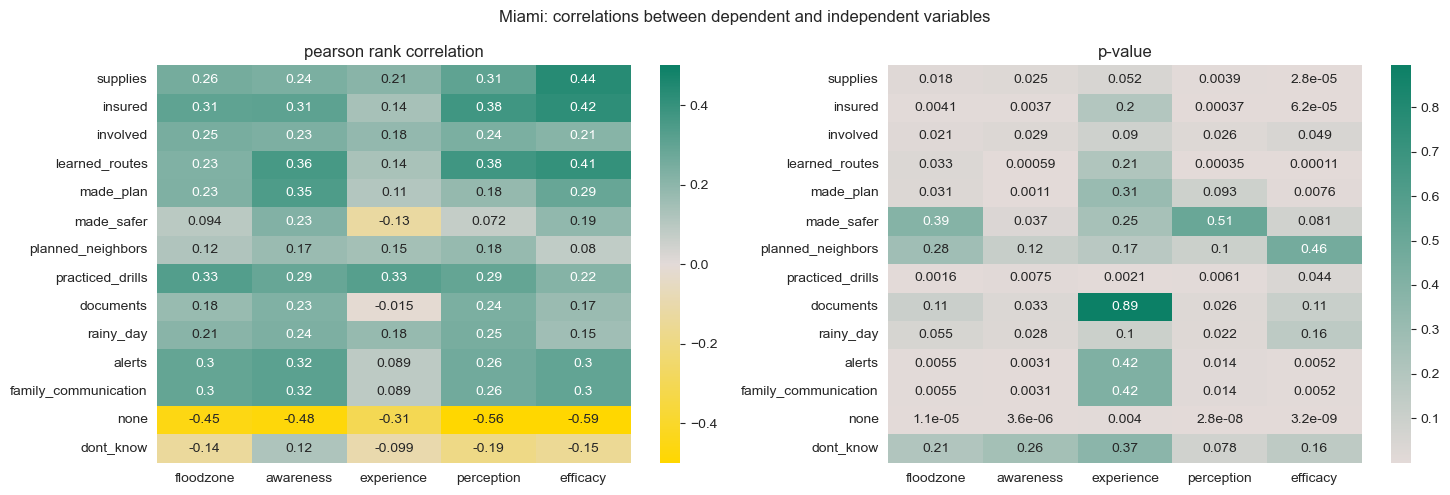

In [ ]:
# Miami
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(miami[var], miami[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(miami[var], miami[v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Miami: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/miami.png')

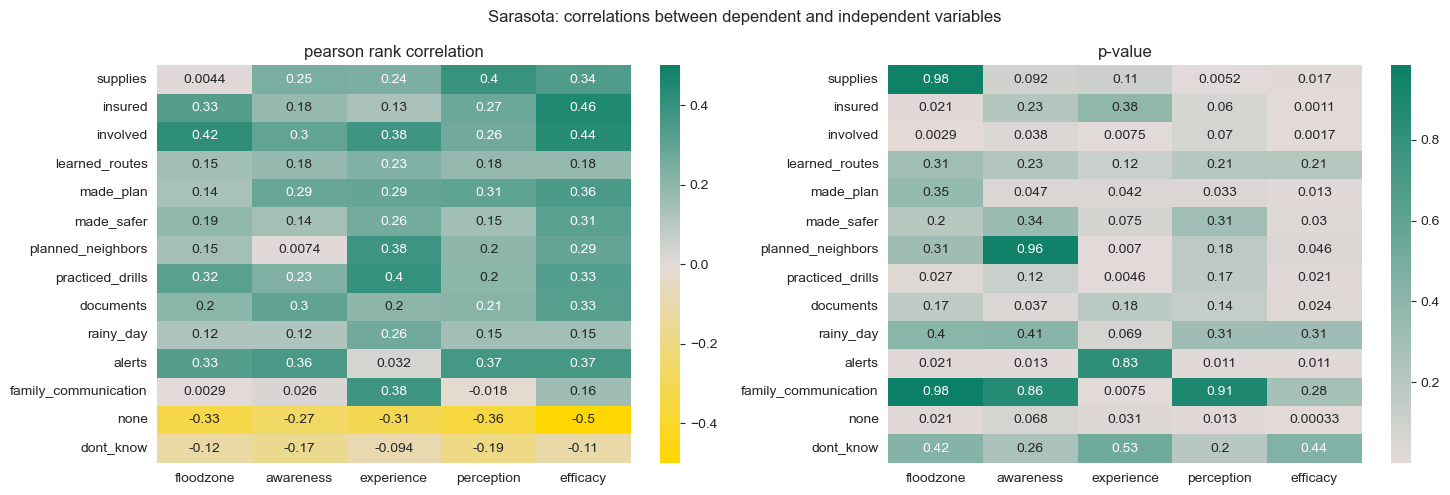

In [ ]:
# Sarasota
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(sarasota[var], sarasota[v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(sarasota[var], sarasota[v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap=sequential, annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Sarasota: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/sarasota.png')

<span style = 'color: lightgreen'>

Adaptation Fatigue: 
- In Jacksonville experience seems to be much lower correlated with certain adaptaion variables than in York.
- Weaker effect but same effect direction in Miami. 
- We can hypothesize which variables are impacted by adaptaion fatigue and which are not 

<span style = 'color: orange'>

Let's check the hypothesis against larger regions (Florida v New York)


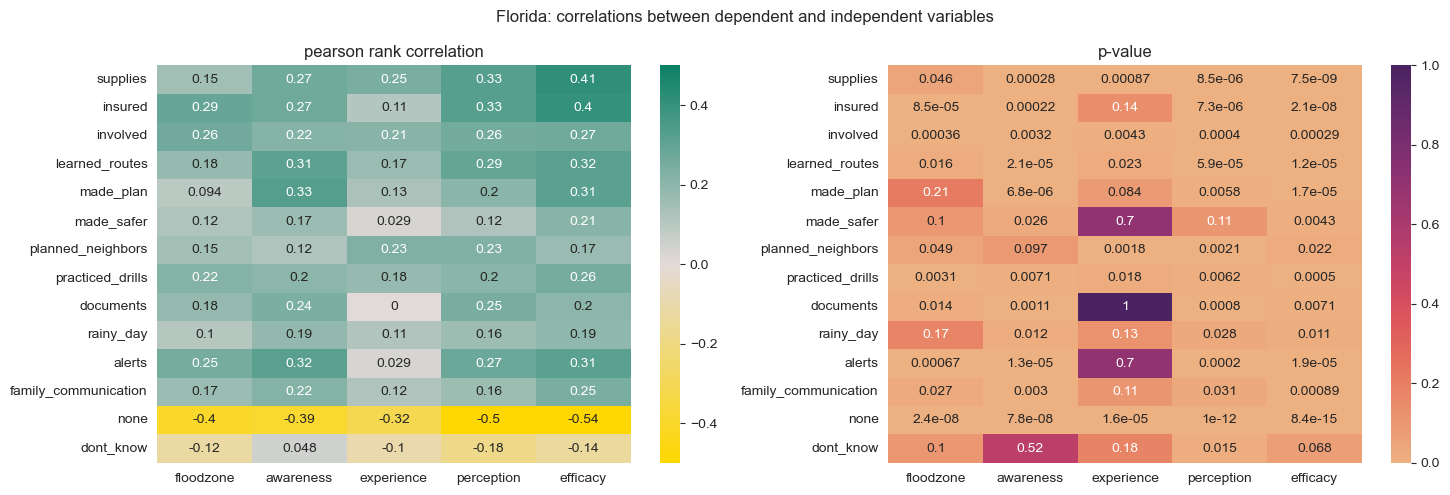

In [ ]:
# Florida
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(df.loc[df['state'] == 'Florida',var], df.loc[df['state'] == 'Florida', v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(df.loc[df['state'] == 'Florida',var], df.loc[df['state'] == 'Florida', v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap='flare', annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Florida: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/florida.png')

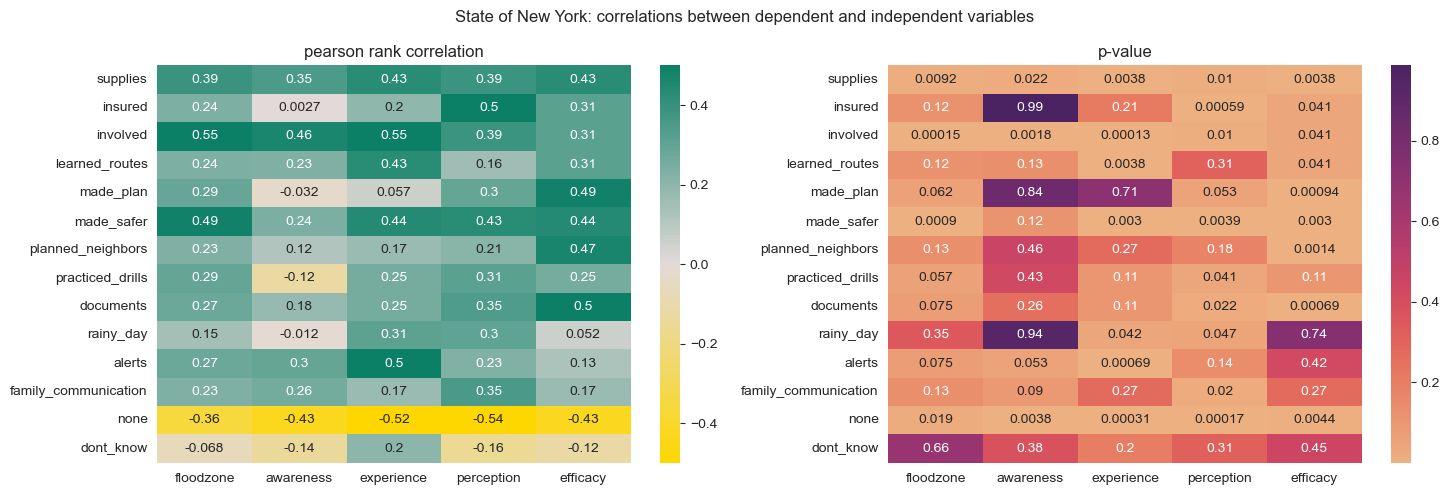

In [ ]:
# Florida
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(df.loc[df['state'] == 'New York',var], df.loc[df['state'] == 'New York', v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(df.loc[df['state'] == 'New York',var], df.loc[df['state'] == 'New York', v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap='flare', annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('State of New York: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/State_of_New_York.png')

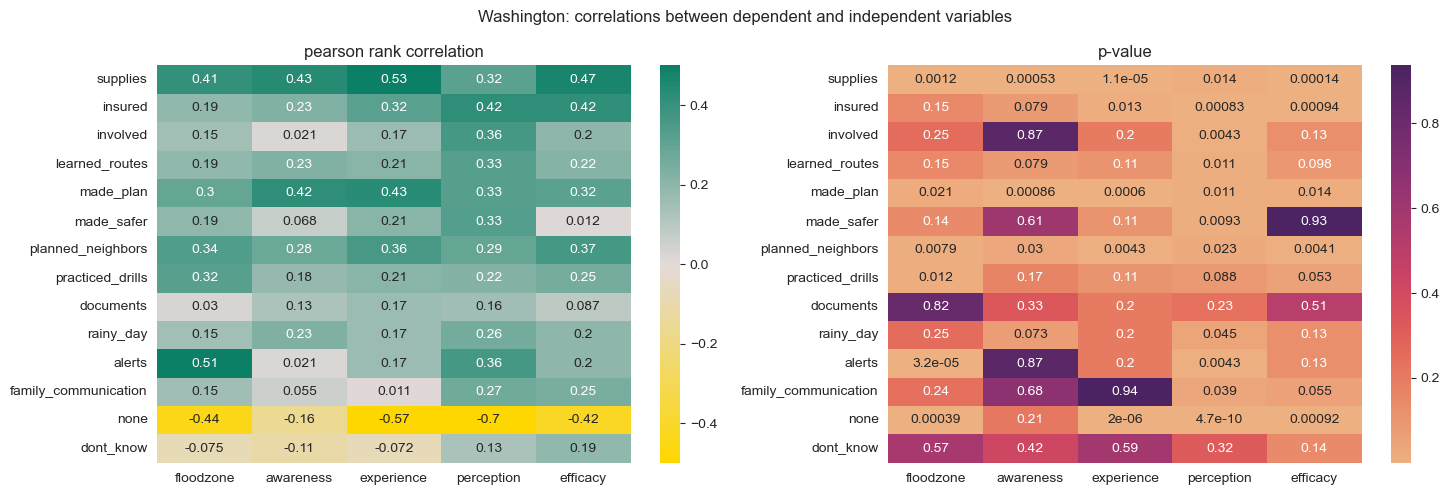

In [ ]:
# Washington
dep_ind = pd.DataFrame(columns=dependent, index=independent)
dep_cov = pd.DataFrame(columns=dependent, index=covariate)
for idx, var in enumerate(dependent):
    dep_ind[var] = [stats.spearmanr(df.loc[df['state'] == 'Washington',var], df.loc[df['state'] == 'Washington', v]) for v in independent] #stats.spearman returns tuple(statistic, p-value)
    dep_cov[var] = [stats.spearmanr(df.loc[df['state'] == 'Washington',var], df.loc[df['state'] == 'Washington', v]) for v in covariate]

#plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data=dep_ind.applymap(lambda x: x[0]).transpose(), ax=ax[0], cmap=yellow_bright, vmin=-0.5, vmax=0.5, annot=True) 
sns.heatmap(data=dep_ind.applymap(lambda x: x[1]).transpose(), ax=ax[1], cmap='flare', annot=True) 
ax[0].set_title('pearson rank correlation')
ax[1].set_title('p-value')
plt.suptitle('Washington: correlations between dependent and independent variables')
plt.tight_layout()
plt.savefig('figures/relations/Washington.png')

In [79]:
#Let's drill into zipcode level adaptation distribution per focus region 
florida_adaptations = gdf.groupby('zipcode').agg(
    supplies = ('supplies','sum'),
    insurance = ('insured','sum'),
    involved = ('involved','sum'),
    learned_routes = ('learned_routes','sum'),
    made_plan =  ('made_plan', 'sum'),
    made_safer = ('made_safer', 'sum'),
    planned_neighbors = ('planned_neighbors', 'sum'),
    practiced_drills = ('practiced_drills', 'sum'),
    documents = ('documents', 'sum'),
    rainy_day = ('rainy_day', 'sum'),
    alerts = ('alerts', 'sum'),
    family_communication = ('family_communication', 'sum'),
    none = ('none', 'sum'),
    dont_know = ('dont_know', 'sum')
)

In [80]:
newjersey_adaptations = gdf.groupby('zipcode').agg(
    supplies = ('supplies','sum'),
    insurance = ('insured','sum'),
    involved = ('involved','sum'),
    learned_routes = ('learned_routes','sum'),
    made_plan =  ('made_plan', 'sum'),
    made_safer = ('made_safer', 'sum'),
    planned_neighbors = ('planned_neighbors', 'sum'),
    practiced_drills = ('practiced_drills', 'sum'),
    documents = ('documents', 'sum'),
    rainy_day = ('rainy_day', 'sum'),
    alerts = ('alerts', 'sum'),
    family_communication = ('family_communication', 'sum'),
    none = ('none', 'sum'),
    dont_know = ('dont_know', 'sum')
)

<span style = 'color:orange'>

Let's see if regression confirms the patterns

In [68]:
model = smf.logit("alerts ~ experience", data=newyork).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.338335
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 alerts   No. Observations:                   47
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                  0.2584
Time:                        14:54:48   Log-Likelihood:                -15.902
converged:                       True   LL-Null:                       -21.443
Covariance Type:            nonrobust   LLR p-value:                 0.0008719
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3673      1.017     -3.311      0.001      -5.361      -1.374
experience     3.0106      1.

In [69]:
model = smf.logit('alerts ~ experience', data=jacksonville).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.637033
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 alerts   No. Observations:                   29
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                 0.01110
Time:                        14:54:49   Log-Likelihood:                -18.474
converged:                       True   LL-Null:                       -18.681
Covariance Type:            nonrobust   LLR p-value:                    0.5195
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4520      0.483     -0.935      0.350      -1.400       0.496
experience    -0.5288      0.

In [70]:
jacksonville.practiced_drills.mean()

0.10344827586206896

In [71]:
newyork.practiced_drills.mean()

0.0851063829787234

# Prints

### perception: west, east, south 

In [ ]:
'''
bounds = (-8500000, 4500000, -8000000, 5100000) #new jersey 
fig, ax = plt.subplots(figsize=(10,10))   
gdf.plot(ax=ax, cmap='flare', column='perception', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.savefig('figures/density/perception_newjersey.png')'''


'''bounds = (-9500000, 2800000,  -8700000, 3800000) #florida

fig, ax = plt.subplots(figsize=(10,10))   
gdf.plot(ax=ax, cmap='flare', column='perception', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title('perception florida')
plt.savefig('figures/density/perception_florida.png')'''

'''bounds = (-14000000, 5300000, -13000000, 6500000) # seattle

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, cmap='flare', column='perception', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)
plt.title('perception seattle')
plt.savefig('figures/density/perception_seattle.png')'''


### isurance take up: west, east, south

In [ ]:
'''bounds = (-8500000, 4500000, -8000000, 5100000) #new jersey

fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax, cmap='crest', column='insured')
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Insurance take up')
plt.savefig('figures/density/insurance_newjersey.png')'''

'''bounds = (-9500000, 2800000,  -8700000, 3800000) #florida

fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax, cmap='crest', column='insured')
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Insurance take up')
plt.savefig('figures/density/insurance_florida.png')'''

'''bounds = (-14000000, 5300000, -13000000, 6500000) # seattle

fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax, cmap='crest', column='insured')
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Insurance take up')
plt.savefig('figures/density/insurance_seattle.png')'''

### 3by3 plot: perception, experience, floodzone for west, east, south

In [ ]:
'''bounds = [(-8500000, 4500000, -8000000, 5100000),    #new jersey
          (-9500000, 2800000,  -8700000, 3800000),      #florida
          (-14000000, 5300000, -13000000, 6500000)]     #seattle

variables = ['perception', 'experience', 'floodzone']

fig, ax = plt.subplots(3,3, figsize=(15,12))

for i, variable in enumerate(variables):
    for idx, var in enumerate(bounds):    
        gdf.plot(ax=ax[i,idx], cmap='flare', column=variable, legend=True)
        ax[i,idx].set_xlim(bounds[idx][0], bounds[idx][2])
        ax[i,idx].set_ylim(bounds[idx][1], bounds[idx][3])
        #ax[i,idx].set_axis_off()
        cx.add_basemap(ax[i,idx], source=cx.providers.CartoDB.Positron)

plt.subplots_adjust(wspace=0.05, hspace=0.1) # manually control spacing 
plt.suptitle("perception\nexperience\nfloodzone")
plt.savefig('figures/density/perception.png')'''

### focus regions: number of respondents per zip code: seattle, new york, jacksonville, miami, sarasota 

In [ ]:
bounds = (-13700000, 5950000, -13550000, 6100000) 

fig, ax = plt.subplots(figsize=(10,10))
seattle.plot(ax=ax, cmap='crest', column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)
plt.title('zipcodes seattle: 39 respondents')
#plt.savefig('figures/density/seattle.png')

In [ ]:
bounds = (-8300000, 4920000, -8200000, 5020000) 

fig, ax = plt.subplots(figsize=(10,10))

newyork.plot(ax=ax, cmap='crest', column='zip_count', legend=True);
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('zipcodes new york: 54 respondents')
#plt.savefig('figures/density/newyork.png')

In [ ]:
bounds = (-9150000, 3500000, -9000000, 3600000) 

fig, ax = plt.subplots(figsize=(10,10))

jacksonville.plot(ax=ax, cmap='crest', column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('zip codes jacksonville: 31 respondents')
#plt.savefig('figures/density/jacksonville.png')

In [ ]:
bounds = (-9200000, 2800000, -8700000, 3200000) 

fig, ax = plt.subplots(figsize=(10,10))

miami.plot(ax=ax, cmap='crest', column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('zip codes miami: 87 respondents')
#plt.savefig('figures/density/miami.png')

In [ ]:
bounds = (-9300000, 3000000, -9000000, 3300000) 

fig, ax = plt.subplots(figsize=(10,10))

sarasota.plot(ax=ax, cmap='crest', column='zip_count', legend=True)
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('zip codes sarasota: 49 respondents')
#plt.savefig('figures/density/sarasota.png')